Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [19]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv', sep= ',')


### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [21]:
movies_df.drop(["homepage", "keywords", "original_language", "original_title",
                "overview", "production_companies", "status", "tagline"], axis= 1, inplace= True)
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Remove any duplicate rows

In [22]:
remove_duplicate_rows = movies_df.drop_duplicates()

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [23]:
remove_missing_budget_revenue_data = movies_df.drop_duplicates(subset=['budget', 'revenue'])

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [24]:
# Change the release_date column to DateTime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format= '%Y-%m-%d' )

# Extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year

Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [25]:
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [26]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')

In [27]:
# Inspect flattened data
movies_df.sample(5)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
2650,15000000,"['Action', 'Comedy', 'Drama', 'History']",31668,1.833058,"['Austria', 'Hungary']",2001-10-14,23000,99.0,"['English', 'Deutsch']",All The Queen's Men,6.1,7,2001.0
2950,11000000,"['Comedy', 'Drama', 'Romance']",63020,1.187671,['United States of America'],1995-05-12,2832826,113.0,['English'],The Perez Family,6.6,9,1995.0
3023,9000000,"['Comedy', 'Drama']",11545,18.289303,['United States of America'],1998-09-17,17096053,93.0,"['Français', 'English', 'Latin', 'Español']",Rushmore,7.5,676,1998.0
999,60000000,"['Comedy', 'Drama', 'Romance', 'Science Fiction']",10416,2.275331,['United States of America'],2000-03-03,0,105.0,['English'],What Planet Are You From?,5.4,37,2000.0
418,85000000,"['Comedy', 'Family']",39691,11.773980,"['United States of America', 'Australia']",2010-07-30,112483764,82.0,"['English', 'ภาษาไทย']",Cats & Dogs 2 : The Revenge of Kitty Galore,4.9,119,2010.0


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [28]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_df[movies_df['genres'].str.contains('action', case=False)]
action_movies.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009.0
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007.0
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015.0
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012.0
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012.0


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [29]:
# Code here
expensive_movies = movies_df.nlargest(5, 'budget')
for title in expensive_movies['title']:
    print(title)

Pirates of the Caribbean: On Stranger Tides
Pirates of the Caribbean: At World's End
Avengers: Age of Ultron
Superman Returns
John Carter


#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [30]:
# Code here
profitable_movies = movies_df.nlargest(5, 'revenue')
for title in profitable_movies['title']:
    print(title)



Avatar
Titanic
The Avengers
Jurassic World
Furious 7


#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [31]:
# Code here
popular_movies = movies_df.nlargest(5, 'popularity')
for title in popular_movies['title']:
    print(title)

Minions
Interstellar
Deadpool
Guardians of the Galaxy
Mad Max: Fury Road


#### Find Movies which are rated above 7

In [32]:
# Code here
high_rated_movies = movies_df[movies_df['vote_average'] > 7.0]
for title in high_rated_movies['title']:
    print(title)

Avatar
The Dark Knight Rises
Tangled
Avengers: Age of Ultron
Harry Potter and the Half-Blood Prince
The Avengers
The Hobbit: The Battle of the Five Armies
The Hobbit: The Desolation of Smaug
Titanic
Captain America: Civil War
Toy Story 3
Furious 7
X-Men: Days of Future Past
Star Trek Into Darkness
The Great Gatsby
WALL·E
The Dark Knight
Up
Iron Man
Edge of Tomorrow
Inside Out
Dawn of the Planet of the Apes
Captain America: The Winter Soldier
Big Hero 6
Wreck-It Ralph
How to Train Your Dragon
Guardians of the Galaxy
Interstellar
Inception
The Curious Case of Benjamin Button
X-Men: First Class
Harry Potter and the Order of the Phoenix
Harry Potter and the Goblet of Fire
Ratatouille
Batman Begins
Frozen
Mad Max: Fury Road
Mission: Impossible - Rogue Nation
Rise of the Guardians
The Last Samurai
Star Trek
How to Train Your Dragon 2
The Revenant
The Bourne Ultimatum
The Hunger Games: Catching Fire
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Philosopher's Stone
Pirates of t

#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

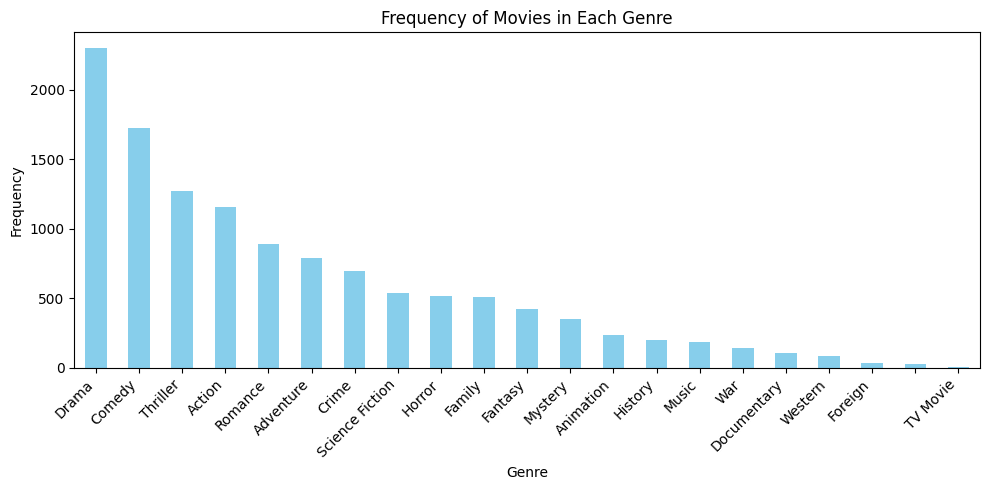

In [33]:
# Split the genres column into separate genres
movies_df['genres'] = movies_df['genres'].str.strip("[]").str.replace("'", "").str.split(', ')
movies_df = movies_df.explode('genres')

# Calculate the frequency of each genre
genre_counts = movies_df['genres'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 5))
genre_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Frequency of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.savefig('Frequency of Movies.png')
plt.show()

**Generate three different interesting visualisations with a data story.**

**Budget vs Revenue Scatterplot:**

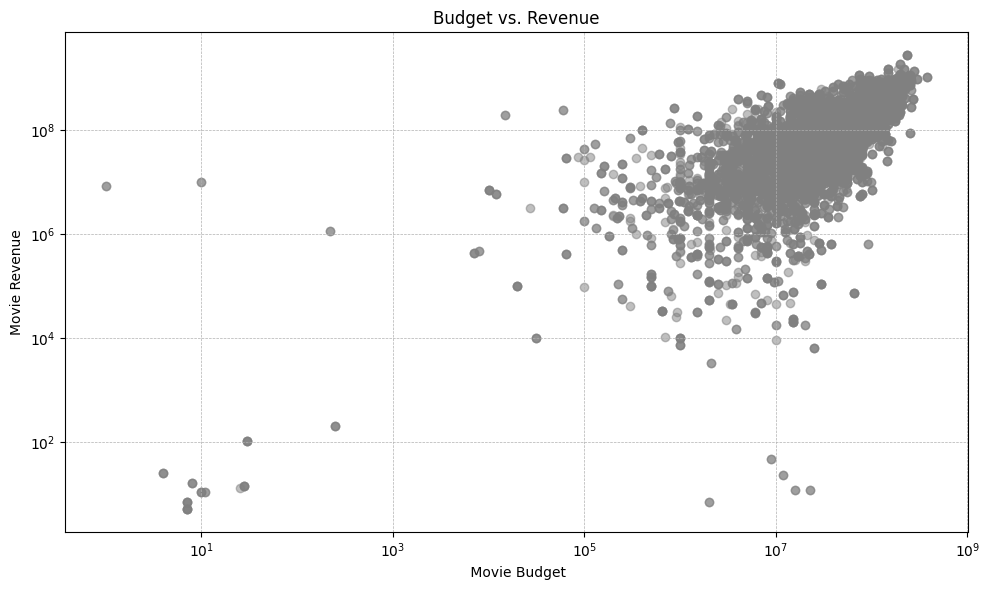

In [34]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['budget'], movies_df['revenue'], color='grey', alpha=0.5)
plt.title('Budget vs. Revenue')
plt.xlabel(' Movie Budget')
plt.ylabel('Movie Revenue')
plt.xscale('log')  # Use log scale for better visualization of wide range values
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('budget vs revenue scatterplot.png')
plt.show()

As shown above in the scatterplot its interesting to see that the greater the budget of a movie, then the greater the revenue of the movies.
This could be down to many factors such as a greater budget means the studio is able to hire bigger "A list" actors and actresses which draws larger audiences 
to their movie. Another reason could be that the bigger the budget then the better the production of the movie can be in regards to special effects and so on
which will no doubt boost the revenue.

**Genre Popularity bar plot:**

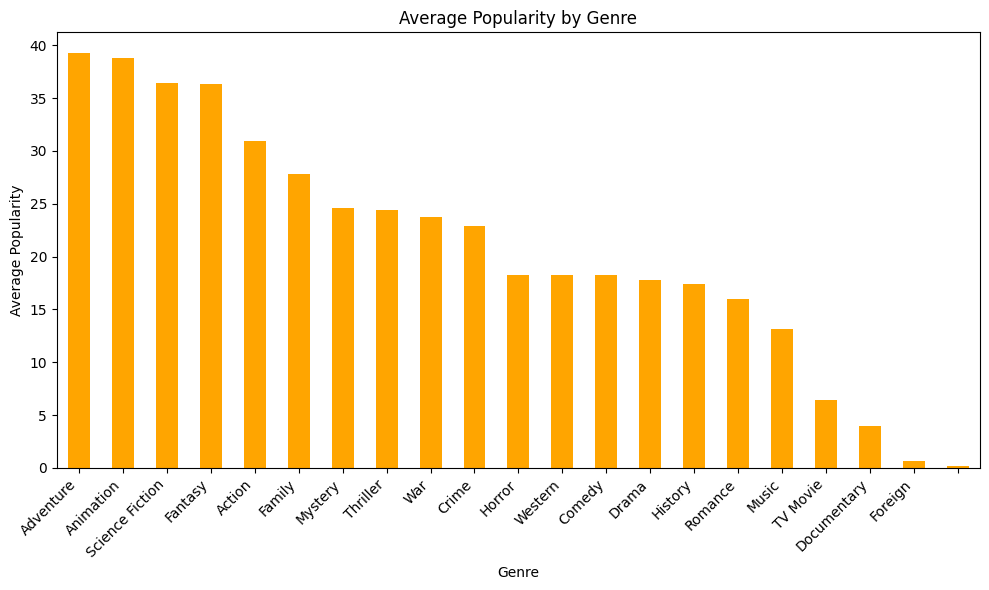

In [35]:
# Split the genres column into separate genres
movies_df['genres'] = movies_df['genres'].str.strip("[]").str.replace("'", "").str.split(', ')
movies_df = movies_df.explode('genres')

# Calculate the average popularity for each genre
genre_popularity = movies_df.groupby('genres')['popularity'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
genre_popularity.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('genre popularity bar plot.png')
plt.show()

One of the interesting things noted in this bar plot is Adventure ranks at the top of the average popularity. When considering so my high quality action movies
that have been produced over the years I would of assumed that Action would feature the highest. In terms of education it is a also worrying that Documentaries
feature so low in the average popularity.

**Release Year Trends Line Plot:**

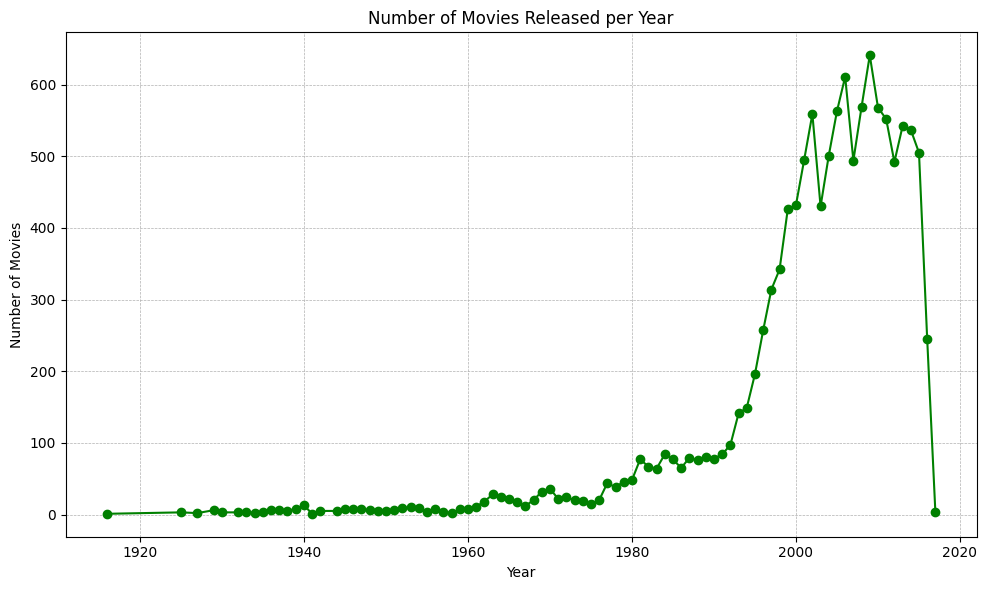

In [36]:
# Extract release year from release_date column
movies_df['release_year'] = pd.to_datetime(movies_df['release_date']).dt.year

# Calculate the number of movies released per year
movies_per_year = movies_df['release_year'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(10, 6))
movies_per_year.plot(kind='line', marker='o', color='green')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('release year trend line.png')
plt.show()

A interesting observation is the amount of movies seem to have drastically increased in the late 1980's to early 1990's. This could be as a result
of the improvement of technology in the filming industry around that time. Around 2009 is where the most movies were produced and noticeably radically decreased.
he global financial crisis that began in 2008 had a significant impact on various industries, including the film industry. 
Reduced funding, tighter budgets, and uncertainty about the economic future could have led to a decrease in movie production.